In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [5]:
def read_algos(file_path):
    # function to specify the way to read instructions in html
    algo_list = []
    with open(file_path,'r') as rf:
        cur_algo = "<br>"
        for line in rf:
            if line == "\n":
                algo_list.append(cur_algo)
                cur_algo = "<br>"
            else:
                line = line.replace("\n", "<br>")
                cur_algo += line

    return algo_list

def plot(df, x_title, y_title, color="Type", title="Final Pareto Front"):
    # plot interactive plots showing the algo specs
    hover_data = list(df.columns)
    hover_data.remove(x_title)
    hover_data.remove(y_title)

    fig = px.scatter(df, x=x_title, y=y_title, hover_data=hover_data, color=color, log_x=True, size_max=60)
    fig.update_traces(textposition='top center', marker_size=10)

    fig.update_layout(
    height=800,
    title_text=title
    )

    fig.show()
    return fig

## Generate the interactive plots for both Intron Removal and Non-Intron Removal cases

In [7]:
# mention the seed list for the data
seed_list = list(range(1, 2))

# mention intron_removal or not
intron_type = "skip_introns"

# mentione objective
obj_type = "Multi-Objective"

type_task = "linear_regression"

type_problem = "scalar_linear_regression"

# select the folder location
folder = f"{obj_type}/{type_task}/{type_problem}/{intron_type}"

for seed in seed_list:
    # load the files
    seeded_folder = f"{folder}/Seed_{seed}/population_size_12"
    pf_train = pd.read_csv(f"{seeded_folder}/final_pf_train.txt", sep=",", names=["Error", "Complexity"])
    pf_test = pd.read_csv(f"{seeded_folder}/final_pf_test.txt", sep=",", names=["Error", "Complexity"])
    algo_list = read_algos(f"{seeded_folder}/final_pf_algos.txt")

    pf_train["Algorithm"] = algo_list
    pf_test["Algorithm"] = algo_list
    pf_train["Type"] = "Train"
    pf_test["Type"] = "Test"

    x_title = "Complexity"
    y_title = "Error"

    pf = pd.concat([pf_train, pf_test])

    # plot and save the html files
    if intron_type == "skip_introns":
        fig = plot(pf, x_title, y_title, color="Type", title="Final Pareto Front with Intron Removal, Seed = " + str(seed))
    else:
        fig = plot(pf, x_title, y_title, color="Type", title="Final Pareto Front without Intron Removal, Seed = " + str(seed))

    print(f"{seeded_folder}/pf_plot_{seed}.html")
    fig.write_html(f"{seeded_folder}/pf_plot_{seed}.html")

Multi-Objective/linear_regression/scalar_linear_regression/skip_introns/Seed_1/population_size_12/pf_plot_1.html


# Plot the time requirements

In [31]:
import re

def read_time(file):
    f = open(file, "r")
    cur_str = f.readline()
    cur_time = re.findall("\d+\.\d+", cur_str)
    
    return float(cur_time[0])

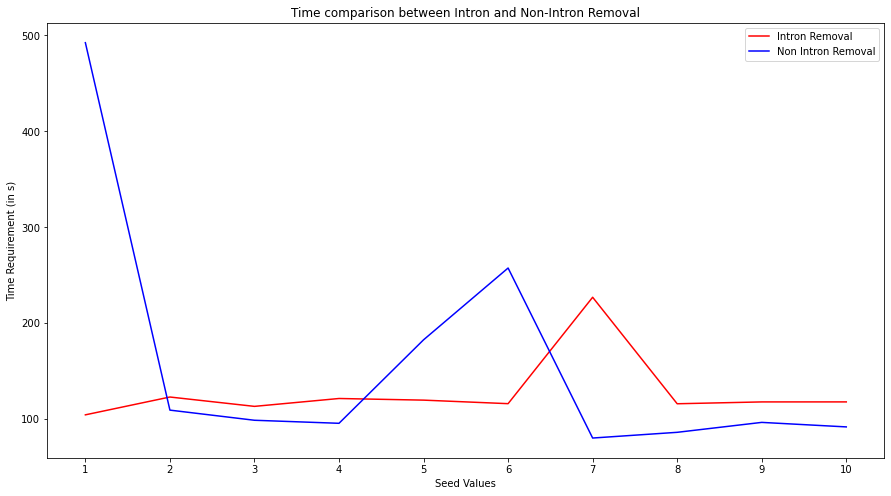

In [32]:
import matplotlib.pyplot as plt

# mention the seed list for the data
seed_list = list(range(1, 11))

time_requirement_intron = []
time_requirement_non_intron = []

for seed in seed_list:
    file_intron = "Intron_Removal/Output_Files/Seed_" + str(seed) + "/final_programs_descriptions.txt"
    file_non_intron = "Non_Intron_Removal/Output_Files/Seed_" + str(seed) + "/final_programs_descriptions.txt"
    time_requirement_intron.append(read_time(file_intron))
    time_requirement_non_intron.append(read_time(file_non_intron))

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
xticks = np.arange(10)
ax.plot(xticks, time_requirement_intron, c="r", label="Intron Removal")
ax.plot(xticks, time_requirement_non_intron, c="b", label="Non Intron Removal")
ax.set_xticks(xticks)
ax.set_xticklabels(seed_list)
ax.set_xlabel("Seed Values")
ax.set_ylabel("Time Requirement (in s)")
ax.set_title("Time comparison between Intron and Non-Intron Removal")
ax.legend(loc="upper right")
plt.savefig("Time Comparison.jpg")

# Testing for Crossover

In [43]:
folder = "Intron_Removal/Output_Files/Crossover_Testing/"
wo_crossover = folder + "Without Crossover/"
w_crossover = folder + "With Crossover/"

# load the files
pf_train_w_cross = pd.read_csv(w_crossover + "final_pf_train.txt", sep=",", names=["Error", "Complexity"])
pf_test_w_cross = pd.read_csv(w_crossover + "final_pf_test.txt", sep=",", names=["Error", "Complexity"])
algo_list_w_cross = read_algos(w_crossover + "final_pf_algos.txt")

pf_train_wo_cross = pd.read_csv(wo_crossover + "final_pf_train.txt", sep=",", names=["Error", "Complexity"])
pf_test_wo_cross = pd.read_csv(wo_crossover + "final_pf_test.txt", sep=",", names=["Error", "Complexity"])
algo_list_wo_cross = read_algos(wo_crossover + "final_pf_algos.txt")

pf_train_w_cross["Algorithm"] = algo_list_w_cross
pf_test_w_cross["Algorithm"] = algo_list_w_cross
pf_train_w_cross["Type"] = "Train"
pf_test_w_cross["Type"] = "Test"

pf_train_wo_cross["Algorithm"] = algo_list_wo_cross
pf_test_wo_cross["Algorithm"] = algo_list_wo_cross
pf_train_wo_cross["Type"] = "Train"
pf_test_wo_cross["Type"] = "Test"

x_title = "Complexity"
y_title = "Error"

pf_w_cross = pd.concat([pf_train_w_cross, pf_test_w_cross])
pf_wo_cross = pd.concat([pf_train_wo_cross, pf_test_wo_cross])

# plot and save the html files
fig_w_cross = plot(pf_w_cross, x_title, y_title, color="Type", title="Final Pareto Front with Intron Removal, Crossover = True")
fig_wo_cross = plot(pf_wo_cross, x_title, y_title, color="Type", title="Final Pareto Front with Intron Removal, Crossover = False")

fig_w_cross.write_html(folder + "Images/pf_plot_w_cross.html")
fig_wo_cross.write_html(folder + "Images/pf_plot_wo_cross.html")

# Scaling with respect to number of features

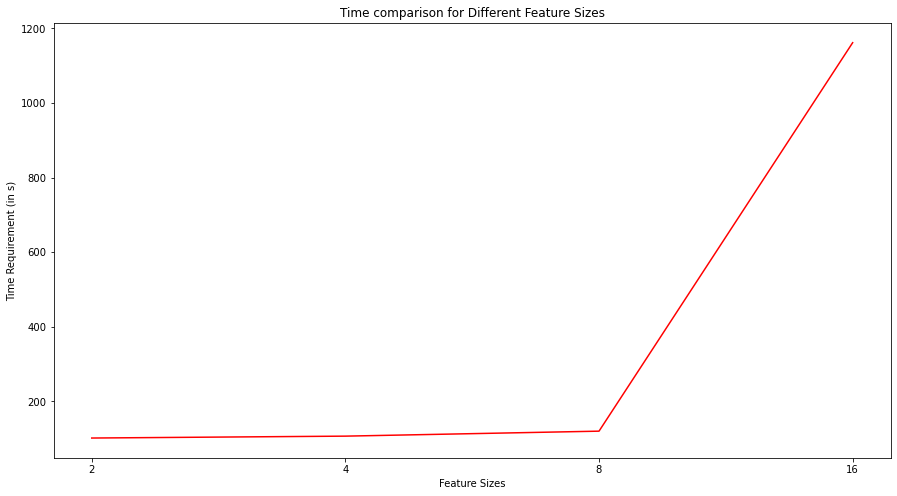

In [48]:
base_folder = "Intron_Removal/Output_Files/Scaling/"
feature_sizes = [2, 4, 8, 16]
time_requirement = []


for feature_size in feature_sizes:
    folder_name = base_folder + "Feature_Size_" + str(feature_size) + "/" 

    pf_train = pd.read_csv(folder_name + "final_pf_train.txt", sep=",", names=["Error", "Complexity"])
    pf_test = pd.read_csv(folder_name + "final_pf_test.txt", sep=",", names=["Error", "Complexity"])
    algo_list = read_algos(folder_name + "final_pf_algos.txt")

    time_requirement.append(read_time(folder_name + "final_programs_descriptions.txt"))

    pf_train["Algorithm"] = algo_list
    pf_test["Algorithm"] = algo_list
    pf_train["Type"] = "Train"
    pf_test["Type"] = "Test"

    x_title = "Complexity"
    y_title = "Error"

    pf = pd.concat([pf_train, pf_test])

    # plot and save the html files
    fig = plot(pf, x_title, y_title, color="Type", title="Final Pareto Front with Intron Removal, Feature Size: " + str(feature_size))

    fig.write_html(base_folder + "Images/pf_plot_feature_size_" + str(feature_size) + ".html")

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
xticks = np.arange(len(time_requirement))
ax.plot(xticks, time_requirement, c="r")
ax.set_xticks(xticks)
ax.set_xticklabels(feature_sizes)
ax.set_xlabel("Feature Sizes")
ax.set_ylabel("Time Requirement (in s)")
ax.set_title("Time comparison for Different Feature Sizes")
plt.savefig(base_folder + "Images/Time Comparison.jpg")


In [34]:
import matplotlib.pyplot as plt

folder = "Multi-Objective/linear_regression/scalar_linear_regression/skip_introns/Seed_1/population_size_12"

mut_hv_file = f"{folder}/HV_exp_mut.txt"
cross_mut_hv_file = f"{folder}/HV_exp_cross_mut.txt"

df_mut_hv = pd.read_csv(mut_hv_file, sep=",")
df_cross_mut_hv = pd.read_csv(cross_mut_hv_file, sep=",")

df_mut_hv_vals = df_mut_hv.values
df_cross_mut_hv_vals = df_cross_mut_hv.values

plt.plot(df_mut_hv_vals[:, 0], df_mut_hv_vals[:, 1], label="Only Mutation")
plt.plot(df_cross_mut_hv_vals[:, 0], df_cross_mut_hv_vals[:, 1], c="r", label="Crossover+Mutation")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume (wrt the point (100, 1))")
plt.title("Hypervolume Plots for Different Number of Function Evaluations")
plt.legend(loc="lower right")
plt.savefig(f"{folder}/HV_plot_mut_cross.jpg")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Multi-Objective/linear_regression/scalar_linear_regression/skip_introns/Seed_1/population_size_12/HV_exp_mut.txt'

In [33]:
import matplotlib.pyplot as plt

folder = "Multi-Objective/linear_regression/scalar_linear_regression/skip_introns/Seed_1/population_size_12"

mut_surv_file = f"{folder}/survival_exp_mut.txt"
cross_mut_surv_file = f"{folder}/survival_exp_cross_mut.txt"

df_mut_surv = pd.read_csv(mut_surv_file, sep=",")
df_cross_mut_surv = pd.read_csv(cross_mut_surv_file, sep=",")

df_mut_surv_vals = df_mut_surv.values
df_cross_mut_surv_vals = df_cross_mut_surv.values

plt.plot(df_mut_surv_vals[:, 0], df_mut_surv_vals[:, 1], label="Only Mutation")
plt.plot(df_cross_mut_surv_vals[:, 0], df_cross_mut_surv_vals[:, 1], c="r", label="Crossover+Mutation")

plt.xlabel("Function Evaluations")
plt.ylabel("Child Survival Fraction")
plt.title("Child Survival Fraction for Different Number of Function Evaluations")
plt.legend(loc="upper right")
plt.savefig(f"{folder}/survival_plot_mut_cross.jpg")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Multi-Objective/linear_regression/scalar_linear_regression/skip_introns/Seed_1/population_size_12/survival_exp_mut.txt'

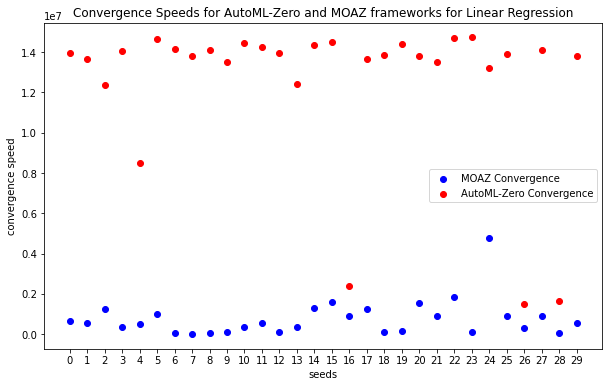

In [32]:
df = pd.read_csv("../Workbook.csv", index_col=0)
num_seeds, _ = df.shape
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["multi_obj"], c="b", label="MOAZ Convergence")
plt.scatter(df.index, df["single_obj"], c="r", label="AutoML-Zero Convergence")
plt.legend(loc="center right")
plt.xticks(np.arange(num_seeds))
plt.xlabel("seeds")
plt.ylabel("convergence speed")
plt.title("Convergence Speeds for AutoML-Zero and MOAZ frameworks for Linear Regression")
plt.savefig("convergence_speed_comparison.jpg")
plt.show()

In [12]:
df

,Without Constr,With Constr (max error = 0.6),Single-Objective
Seed,,,
0,1483824,653472,13950000
1,1084008,534384,13634000
2,123192,1230708,12351790
3,268752,339372,14046000
4,169428,482364,8495638
5,63600,978480,14665000
6,160788,33984,14167000
7,2155464,8676,13814000
8,1074120,73608,14120000
